**Descriptive Statistics and Python Implementation**

**Question:**
**Write a Jupyter Notebook explaining all the Descriptive Statistics. **

1. Mean
2. Median
3. Mode
4. Variance
5. Standard Deviation
6. Correlation
7. Normal Distribution (use references)
8. Feature of Normal Distribution
9. Positively Skewed & Negatively Skewed Normal Distribution
10. Effect on Mean, Median and Mode due to Skewness
11. Explain QQ Plot and show the implementation of the same
12. Explain Box Cox and show the implementation of the same

Dataset Link: https://drive.google.com/file/d/1l040PTRmQ9fw5VULbwG-qM6P2A5xZIBQ/edit

Explain each topic (mentioned above) with the help of images, code examples (with and without library functions) and formulas (written using LaTeX)


In [15]:
#importing requirements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats
filterwarnings("ignore")
%matplotlib inline     
sns.set(color_codes=True)

In [16]:
#loading dataset
df = pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [18]:
df = df.rename(columns={"Mthly_HH_Income": "M_INCOME", "Mthly_HH_Expense": "M_EXPENSE", "No_of_Fly_Members": "MEMBERS", "Emi_or_Rent_Amt": "AMOUNT","Annual_HH_Income": "A_INCOME", "Highest_Qualified_Member": "QUALIFICATION", "No_of_Earning_Members": "EARNING" })
df.head(5)

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,QUALIFICATION,EARNING
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [19]:
df.shape

(50, 7)

In [20]:
df.count()      # Used to count the number of rows

M_INCOME         50
M_EXPENSE        50
MEMBERS          50
AMOUNT           50
A_INCOME         50
QUALIFICATION    50
EARNING          50
dtype: int64

In [21]:
df.describe()

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,EARNING
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


##Since Highest_Qualified_Member is non-numeric data, we need to drop it

In [24]:
df.drop('QUALIFICATION',inplace=True,axis=1)
df.head()

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,EARNING
0,5000,8000,3,2000,64200,1
1,6000,7000,2,3000,79920,1
2,10000,4500,2,0,112800,1
3,10000,2000,1,0,97200,1
4,12500,12000,2,3000,147000,1


**MEAN:**
mean is the total of the sum of all values in a collection of numbers divided by the number of numbers in a collection.

Finding mean with library function

In [25]:
#Finding mean with library function 
df.mean()

M_INCOME      41558.00
M_EXPENSE     18818.00
MEMBERS           4.06
AMOUNT         3060.00
A_INCOME     490019.04
EARNING           1.46
dtype: float64

Finding median with formula

In [38]:
mean1= df.sum()/df.count() 
mean1

M_INCOME      41558.00
M_EXPENSE     18818.00
MEMBERS           4.06
AMOUNT         3060.00
A_INCOME     490019.04
EARNING           1.46
dtype: float64

**MEDIAN:**
The middle number found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).

Finding median with library function

In [9]:
df.median()

M_INCOME      35000.0
M_EXPENSE     15500.0
MEMBERS           4.0
AMOUNT            0.0
A_INCOME     447420.0
EARNING           1.0
dtype: float64

Finding median with formula

In [28]:
df1 = df.apply(lambda x: x.sort_values().values)
n=df1.count()
n=int(n[0])
df.head()

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,EARNING
0,5000,8000,3,2000,64200,1
1,6000,7000,2,3000,79920,1
2,10000,4500,2,0,112800,1
3,10000,2000,1,0,97200,1
4,12500,12000,2,3000,147000,1


In [30]:
#using formula
l=list(df1.columns)
r=[]
for i in range(6):
    r.append(list(df1.iloc[0:,i]))
for i in range(6):  
    if n % 2 == 0:
        median1 = r[i][n//2]

        median2 = r[i][n//2 - 1]
        median = (median1 + median2)/2
    else:
        median =r[i][n//2]

    print(str(l[i]),(median))

M_INCOME 35000.0
M_EXPENSE 15500.0
MEMBERS 4.0
AMOUNT 0.0
A_INCOME 447420.0
EARNING 1.0


**MODE:**
The most frequent number—that is, the number that occurs the highest number of times.

Finding mode with library function

In [10]:
df.mode()

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,QUALIFICATION,EARNING
0,45000,25000,4,0,590400,Graduate,1


Finding mode with formula

In [31]:
#without inbuilt function
for i in range(6):
    m=max(r[i],key=r[i].count)
    print(str(l[i]),':',m)

M_INCOME : 45000
M_EXPENSE : 25000
MEMBERS : 4
AMOUNT : 0
A_INCOME : 590400
EARNING : 1


**VARIANCE:**
The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean.

Finding variance with library function

In [33]:
df.var()

M_INCOME     6.811009e+08
M_EXPENSE    1.461733e+08
MEMBERS      2.302449e+00
AMOUNT       3.895551e+07
A_INCOME     1.024869e+11
EARNING      5.391837e-01
dtype: float64

Finding variance using formula

In [34]:
sum=0 
v=[]
mean1=list(df.sum()/df.count())
for i in range(6):
    for j in range(50):
        sum=sum+(r[i][j]-mean1[i])**2
    v.append(sum/n)
    sum=0
print(v)

[667478836.0, 143249876.0, 2.2563999999999984, 38176400.0, 100437186889.95831, 0.5284]


**STANDARD DEVIATION:**
It is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. 

Finding standard deviation with library function

In [12]:
df.std()

M_INCOME      26097.908979
M_EXPENSE     12090.216824
MEMBERS           1.517382
AMOUNT         6241.434948
A_INCOME     320135.792123
EARNING           0.734291
dtype: float64

Finding standard deviation with formula

In [36]:
import math
sum=0
m=[]
mean1=list(df.sum()/df.count())
for i in range(6):
    for j in range(50):
        sum=sum+(r[i][j]-mean1[i])**2
    m.append(math.sqrt(sum/n))
    sum=0
print(m)

[25835.611779092826, 11968.704023410388, 1.5021318184500314, 6178.705366013175, 316918.26531451027, 0.72691127381545]


**CORRELATION:**
It is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

Finding correlation with library function

In [13]:
df.corr()

,M_INCOME,M_EXPENSE,MEMBERS,AMOUNT,A_INCOME,EARNING
M_INCOME,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
M_EXPENSE,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
MEMBERS,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
AMOUNT,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
A_INCOME,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
EARNING,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


Finding correlation with formula

In [39]:
# Without Library Function

x = r[0]
y = r[1]

x_mean = np.sum(x) / len(x)
y_mean = np.sum(y) / len(y)

cov_xy = [(i - x_mean) * (j - y_mean) for i,j in zip(x, y)]
cov_xy = np.sum(cov_xy) / len(cov_xy)

x_std = (np.sum([(i - x_mean)**2 for i in x]) / len(x)) ** 0.5
y_std = (np.sum([(i - y_mean)**2 for i in y])/len(y)) ** 0.5
correlation = cov_xy / (x_std * y_std)

print('Pearson Correlation Coefficient :', correlation)

Pearson Correlation Coefficient : 0.984269278598793


**NORMAL DISTRIBUTION:**
It is also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

In graphical form, the normal distribution appears as a "bell curve".

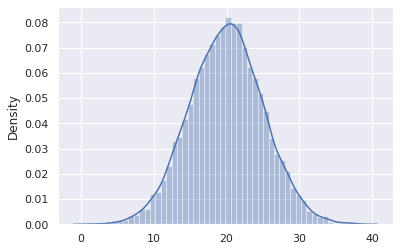

In [40]:
#Generating normal distribution
norm_dist = np.random.normal(loc = 20, scale = 5, size=10000)
sns.distplot(norm_dist)

In [41]:
mu_norm_dist = norm_dist.mean()
sigma_norm_dist = norm_dist.std()
print(mu_norm_dist, sigma_norm_dist)

19.96059871993339 5.0225560385907


In [42]:
one_std_right = mu_norm_dist + (1 * sigma_norm_dist)
one_std_left = mu_norm_dist - (1 * sigma_norm_dist)
two_std_right = mu_norm_dist + (2 * sigma_norm_dist)
two_std_left = mu_norm_dist - (2 * sigma_norm_dist)
three_std_right = mu_norm_dist + (3 * sigma_norm_dist)
three_std_left = mu_norm_dist - (3 * sigma_norm_dist)

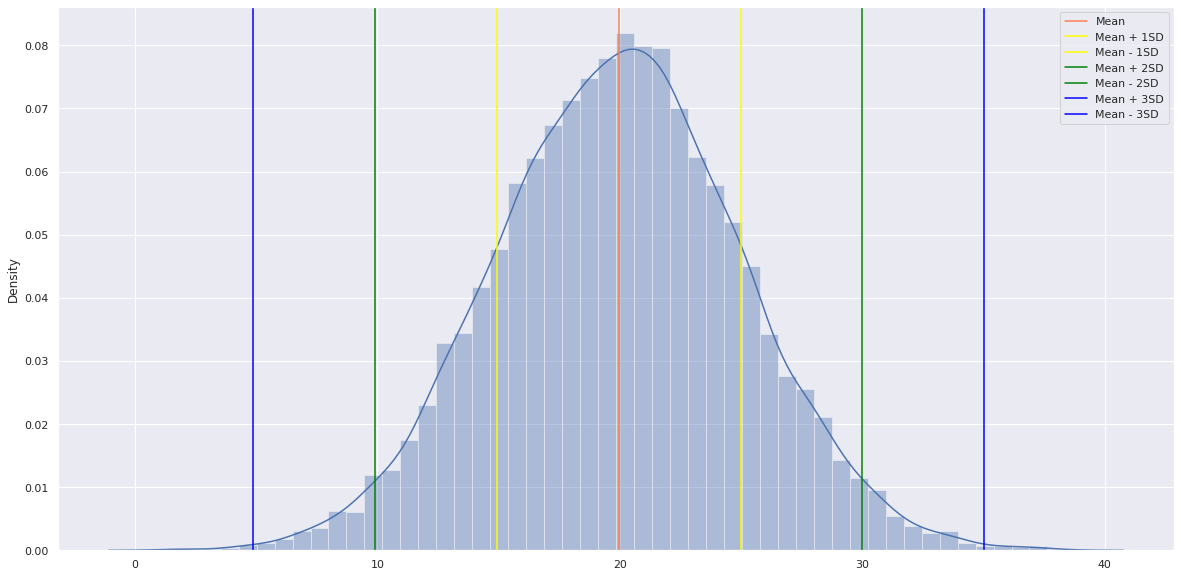

In [43]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.distplot(norm_dist)
plt.axvline(mu_norm_dist, color='coral', label='Mean')
plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();

**THE EMPIRICAL RULE:**
For all normal distributions, 68.2% of the observations will appear within plus or minus one standard deviation of the mean; 95.4% of the observations will fall within +/- two standard deviations; and 99.7% within +/- three standard deviations. This fact is sometimes referred to as the "empirical rule," a heuristic that describes where most of the data in a normal distribution will appear.

This means that data falling outside of three standard deviations ("3-sigma") would signify rare occurrences.

In [44]:
#68-95-99.7 Rule
print(((one_std_left < norm_dist) & (norm_dist < one_std_right)).sum()/norm_dist.size)
print(((two_std_left < norm_dist) & (norm_dist < two_std_right)).sum()/norm_dist.size)
print(((three_std_left < norm_dist) & (norm_dist < three_std_right)).sum()/norm_dist.size)

0.6827
0.9538
0.997


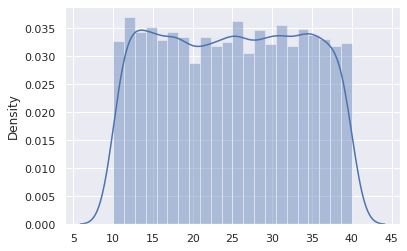

In [45]:
uni_dist = np.random.uniform(low = 10, high = 40, size = (10000))
sns.distplot(uni_dist)

In [46]:
df_new = pd.DataFrame({'uniform' : uni_dist,
                  'normal' : norm_dist})

**SKEWNESS:**
It measures the degree of symmetry of a distribution. The normal distribution is symmetric and has a skewness of zero.

Symmetric means one tail is the mirror image of other half. A left long tail known as left-skewed distribution also known as negative dristibution. A right long tail distribution known as right skewed distribution also known as positive distribution

1. If skewness is less than -1 or greater than 1, the distribution is highly skewed.

2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [60]:
df_new.skew()

uniform    0.001936
normal     0.016038
dtype: float64

In [56]:
##skewness for the first column
df.skew()

M_INCOME     0.924615
M_EXPENSE    1.199461
MEMBERS      0.113674
AMOUNT       3.403680
A_INCOME     1.192949
EARNING      1.593301
dtype: float64

From the above we can see that the Emi_or_Rent_Amt column is highly skewed

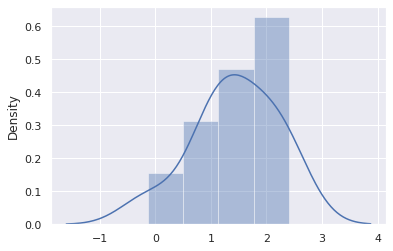

In [57]:
#we are plotting the distribution plot for the first column : Mthly_HH_Income

mean1=np.mean(r[5])
sd=np.std(r[5])

import warnings
warnings.filterwarnings('ignore')
# Plot between -10 and 10 with .001 steps.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean1, sd,10)
# Mean = 0, SD = 2.
sns.distplot(x_axis)

## It is right skewed

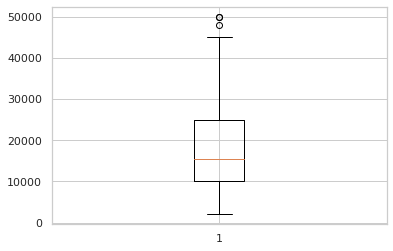

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax.boxplot(r[1])
plt.show()

###Effect on Mean, Median and Mode due to Skewness

Among the three measures of central tendancy mean is highly effected by the skewness.For distributions that has outliers we often choose median as a prefer tendency because median is more resistance than mean, that means that if the add anyt outliers in it then there will be a huge change in mean than median. If we see that the distribution is skewed to the left that means that the mean is less than median,which is often less than the mode. if the distribution is skewed to the right that means the mode is less than the median which is often less than the mean.

**KURTOSIS:**
It measures the thickness of the tail ends of a distribution in relation to the tails of a distribution. The normal distribution has a kurtosis equal to 3.0.

In [48]:
df_new['normal'].kurt()

0.012985422264627289

**QUANTILE-QUANTILE PLOT:**
The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

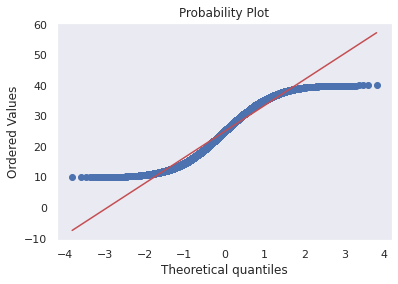

In [49]:
#Checking Normality with QQ Plot
stats.probplot(df_new['uniform'], dist="norm", plot=plt)
plt.grid()

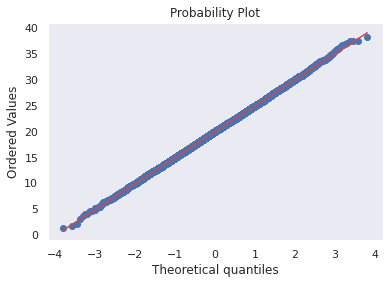

In [50]:
stats.probplot(df_new['normal'], dist="norm", plot=plt)
plt.grid()

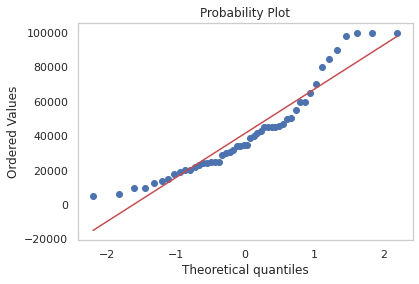

In [62]:
from scipy import stats
stats.probplot(df['M_INCOME'], dist="norm", plot=plt)
plt.grid()

**BOX-COX TRANSFORMATION:**
It is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

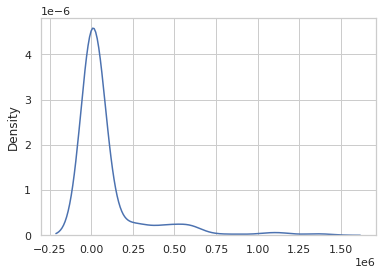

In [63]:
import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

#set seed to 0
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(df, hist=False, kde=True) 

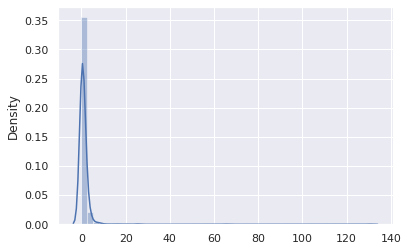

In [51]:
#Box - Cox Transformation
pareto_rv = np.random.pareto(a = 2, size = 1000)
sns.distplot(pareto_rv)

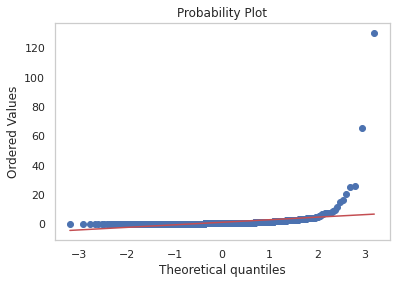

In [68]:
# Normality Test
stats.probplot(pareto_rv, dist="norm", plot=plt)
plt.grid()

In [66]:
# x_t = tranformed by box-cox, l = Lambda
x_t, l = stats.boxcox(pareto_rv)
print(l)

0.07640288623554886


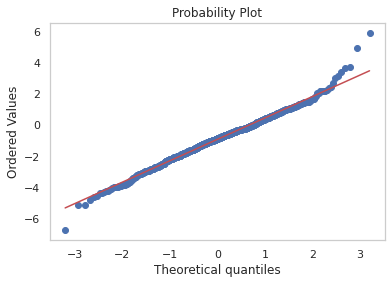

In [67]:
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()